In [70]:
import pandas as pd
import numpy as np
from pandas import *

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
# import plotly.express as px
# import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import gc
import psutil
import os
from sklearn.metrics import mean_absolute_error 

In [71]:

df = pd.read_csv('Crimes_-_2001_to_present.csv', iterator=True, chunksize=100000)  
df = concat(df, ignore_index=True)  

# print data's shape
df.shape

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(1177790, 22)

In [72]:
display(df.head())

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001.0,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017.0,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017.0,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017.0,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017.0,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [73]:
df['Date']= pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S %p' , errors='coerce')

In [74]:
df['Date']

0         2001-01-01 11:00:00
1         2017-10-08 03:00:00
2         2017-03-28 02:00:00
3         2017-09-09 08:17:00
4         2017-08-26 10:00:00
                  ...        
1177785   2018-11-11 02:00:00
1177786                   NaT
1177787                   NaT
1177788                   NaT
1177789                   NaT
Name: Date, Length: 1177790, dtype: datetime64[ns]

In [75]:
df['year'] = df['Date'].dt.year

### Picking out data of last 3 years

In [76]:

df = df[(df['year']==2017) | (df['year']==2018) | (df['year']==2019) ]
display(df.shape)

(630482, 23)

In [77]:
df.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    2467
Arrest                     1
Domestic                   1
Beat                       1
District                   2
Ward                      11
Community Area             5
FBI Code                   1
X Coordinate            8742
Y Coordinate            8742
Year                       1
Updated On                 1
Latitude                8742
Longitude               8742
Location                8742
year                       0
dtype: int64

In [78]:
print('null values =',(8742/len(df))*100,'% of data.') 


null values = 1.3865582205360343 % of data.


#### Drop all null rows

In [79]:
#Drop nan values
df= df.dropna()

In [80]:
#Eliminate duplicate rows
df= df.drop_duplicates()
df = df.drop('year', axis = 1)


In [81]:
#Possible target columns 
#Count Unique Values
df['Arrest'].value_counts()

False    495513
True     124477
Name: Arrest, dtype: int64

#### Getting to know the data

In [82]:
df['Primary Type'].value_counts()

THEFT                                150046
BATTERY                              117916
CRIMINAL DAMAGE                       66874
ASSAULT                               47502
DECEPTIVE PRACTICE                    39815
OTHER OFFENSE                         39499
NARCOTICS                             29230
BURGLARY                              27920
ROBBERY                               24347
MOTOR VEHICLE THEFT                   24154
CRIMINAL TRESPASS                     16156
WEAPONS VIOLATION                     12646
OFFENSE INVOLVING CHILDREN             5195
CRIM SEXUAL ASSAULT                    3712
PUBLIC PEACE VIOLATION                 3430
INTERFERENCE WITH PUBLIC OFFICER       3067
SEX OFFENSE                            2525
PROSTITUTION                           1716
ARSON                                   962
LIQUOR LAW VIOLATION                    582
GAMBLING                                500
STALKING                                458
KIDNAPPING                      

In [83]:
#change true and false by number to plot the data in a map with different colors
df= df.replace({False: 0, True: 1})

/usr/local/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'All Crime Distribution per District')

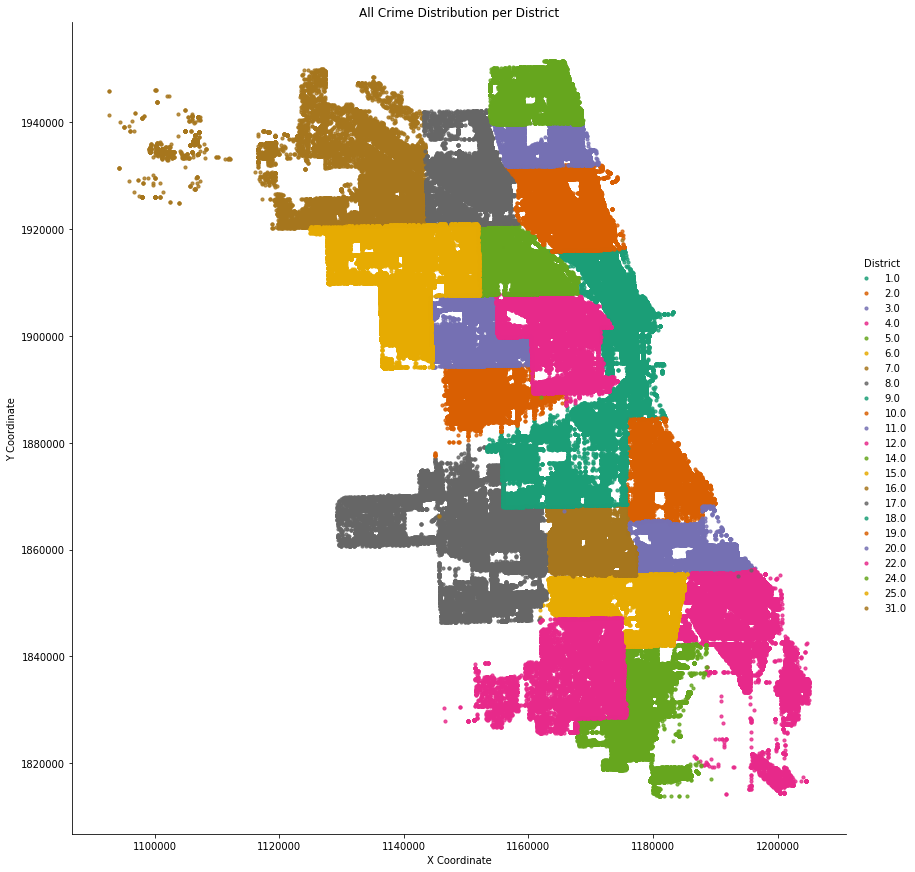

In [84]:
# Created a scatter plot of X and Y coordinates vs all crime data available in the dataset
df = df.loc[(df['X Coordinate']!=0)]

sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=df[:],
           fit_reg=False, 
           hue="District",
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("All Crime Distribution per District")

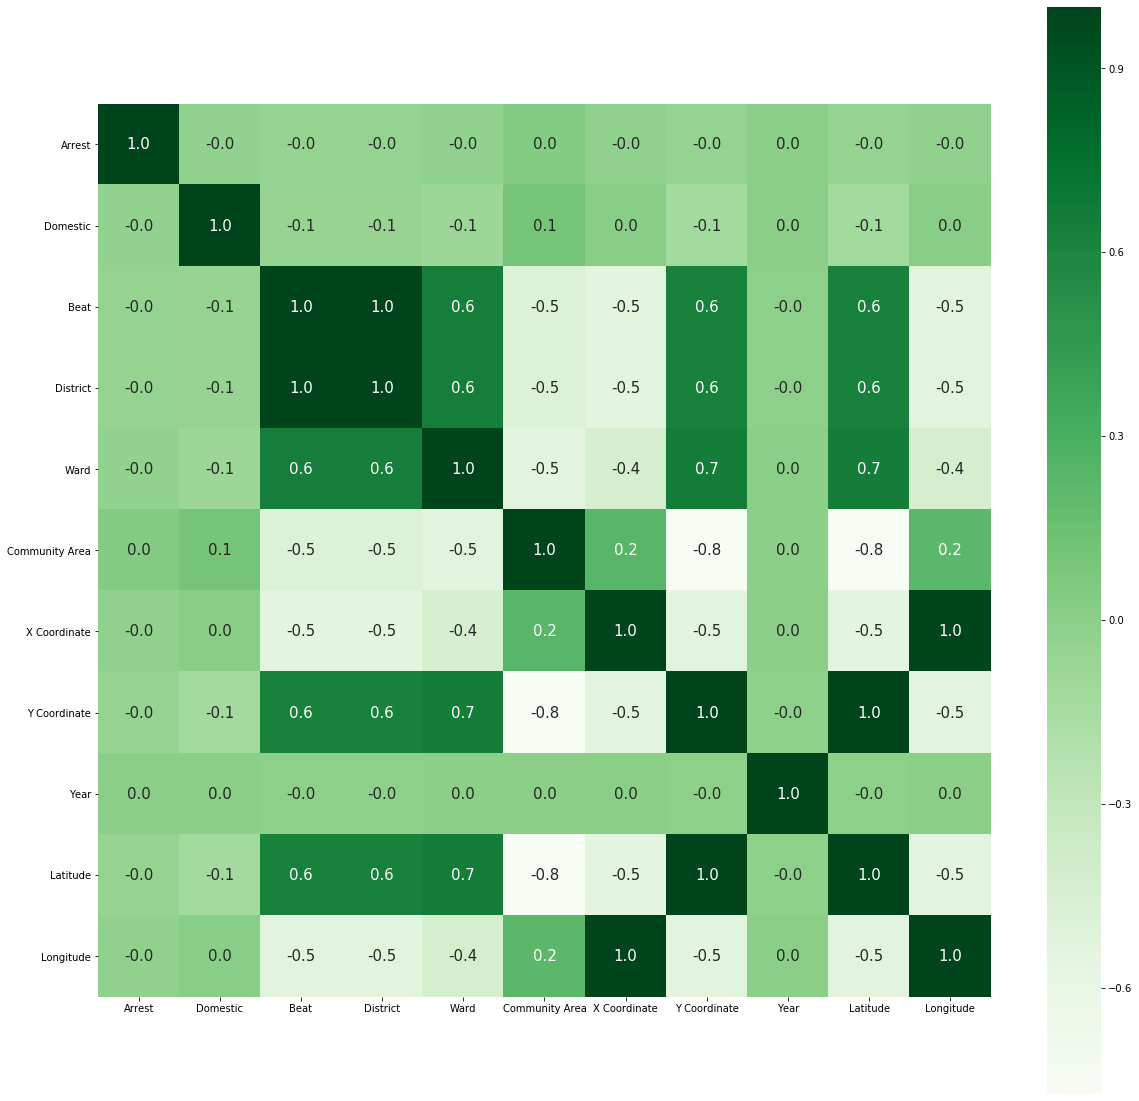

In [130]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

## **Predicting whether a certain crime will result in an arrest or not depending on its features**

### Test/ Train dataset division

In [85]:
target = 'Arrest'
features = df.columns.drop([target,'ID','Case Number','IUCR','Description','Location Description',\
                           'X Coordinate','Y Coordinate','Updated On','Year','Location'])

X = df[features]
y = df[target]

X.shape,y.shape

((619989, 11), (619989,))

In [86]:

display(X.info)

<bound method DataFrame.info of                        Date                  Block            Primary Type  \
60345   2019-01-03 07:20:00        0000X W RWY 27R  PUBLIC PEACE VIOLATION   
62272   2019-03-16 05:58:00       001XX N WELLS ST                 BATTERY   
62615   2019-03-12 10:00:00        008XX E 38TH PL                   THEFT   
62648   2019-03-14 06:42:00     074XX N PAULINA ST                 BATTERY   
62649   2019-03-14 04:03:00        008XX E 38TH PL           OTHER OFFENSE   
...                     ...                    ...                     ...   
1177780 2018-11-11 01:30:00       134XX S AVENUE N           OTHER OFFENSE   
1177781 2018-11-09 08:30:00    022XX S KENNETH AVE                BURGLARY   
1177782 2018-11-10 03:20:00      0000X E GRAND AVE                BURGLARY   
1177783 2018-11-11 12:01:00     005XX W ALDINE AVE         CRIMINAL DAMAGE   
1177784 2018-10-16 08:09:00  017XX W FULLERTON AVE                   THEFT   

         Domestic    Beat  Dist

In [87]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=34)
X_trainval.shape, X_test.shape, y_trainval.shape, y_test.shape

((495991, 11), (123998, 11), (495991,), (123998,))

In [88]:
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=42)

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_val shape', X_val.shape)
print('y_val shape', y_val.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (396792, 11)
y_train shape (396792,)
X_val shape (99199, 11)
y_val shape (99199,)
X_test shape (123998, 11)
y_test shape (123998,)


#### Making an array to hold our predictions

In [89]:
y_train.value_counts(normalize=True)
y_pred = np.full_like(y_val, fill_value=0)


### Confusion Matrix

In [115]:
%matplotlib inline
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

In [91]:
conf_matrix=pd.DataFrame(confusion_matrix(y_val, y_pred))
conf_matrix.index = ['Actual False','Actual True']
conf_matrix.columns = ['Predicted False','Predicted True']
conf_matrix

,Predicted False,Predicted True
Actual False,79269,0
Actual True,19930,0


In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     79269
           1       0.00      0.00      0.00     19930

    accuracy                           0.80     99199
   macro avg       0.40      0.50      0.44     99199
weighted avg       0.64      0.80      0.71     99199



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Convert Date in Month, Day, Hour

In [93]:
def wrangle(X):
    X=X.copy()
    #Engineer date-based features

    X['Month'] = X['Date'].dt.month
    X['Day'] = X['Date'].dt.day
    X['Hour'] = X['Date'].dt.hour
    X['Weekday'] = X['Date'].dt.weekday_name

    X=X.drop(columns=['Date'])
    
    return X

In [94]:
X_train=wrangle(X_train)
X_val=wrangle(X_val)
X_test=wrangle(X_test)

## Logistic Regression

In [118]:
'''Logistic Regression is used when the dependent variable(target) is categorical.'''

import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline


lr= make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    LogisticRegression(n_jobs=-1,solver='lbfgs', random_state=42, penalty='l2', max_iter = 1000)
)

lr.fit(X_train, y_train);


In [119]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_val = lr.predict(X_val)
y_pred_test = lr.predict(X_test)
print('Accuracy for the validation data= ',accuracy_score(y_val, y_pred_val))
print('Accuracy for the test data= ',accuracy_score(y_test, y_pred_test))

Accuracy for the validation data=  0.7861974415064668
Accuracy for the test data=  0.7868997887062694


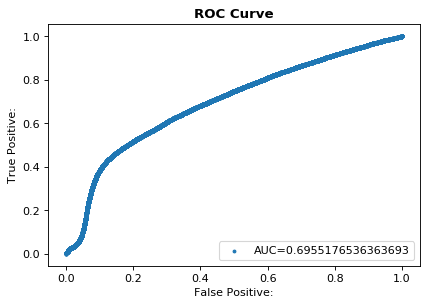

In [120]:
lr_fp,lr_tp,thresholds = roc_curve(y_val,lr.predict_proba(X_val)[:,1])

auc_lr=roc_auc_score(y_val, lr.predict_proba(X_val)[:,1])

fig = plt.figure(dpi=80)
plt.scatter(lr_fp,lr_tp, s=6,label="AUC="+str(auc_lr))
plt.title('ROC Curve', fontweight = 'bold', fontsize = 12)
plt.legend(loc=4)
plt.xlabel('False Positive:', fontsize = 10)
plt.ylabel('True Positive:', fontsize = 10);

In [121]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     99167
           1       0.27      0.04      0.06     24831

    accuracy                           0.79    123998
   macro avg       0.53      0.51      0.47    123998
weighted avg       0.69      0.79      0.72    123998



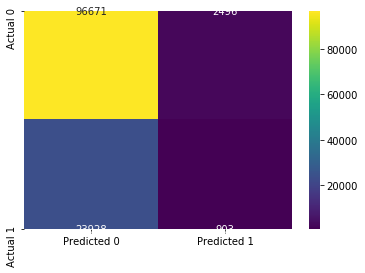

In [122]:
plot_confusion_matrix(y_test, y_pred_test);



In [123]:
display(confusion_matrix(y_test, y_pred_test))

array([[96671,  2496],
       [23928,   903]])

## XGB

In [124]:

from xgboost import XGBClassifier

xgb = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

xgb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Block', 'Primary Type', 'FBI Code',
                                      'Weekday'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Block',
                                          'data_type': dtype('O'),
                                          'mapping': 0000X E 100TH PL              1
016XX S CHRISTIANA AVE        2
001XX S JEFFERSON ST          3
010XX N LAKE SHORE DR         4
062XX S CLAREMONT AVE         5
                          ...  
004XX W 57TH ST           29606
022XX W 6...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_

In [125]:
y_pred_val = xgb.predict(X_val)
y_pred_test = xgb.predict(X_test)
print('Accuracy for the validation data= ',accuracy_score(y_val, y_pred_val))
print('Accuracy for the test data= ',accuracy_score(y_test, y_pred_test))

Accuracy for the validation data=  0.8718737084043185
Accuracy for the test data=  0.8721753576670591


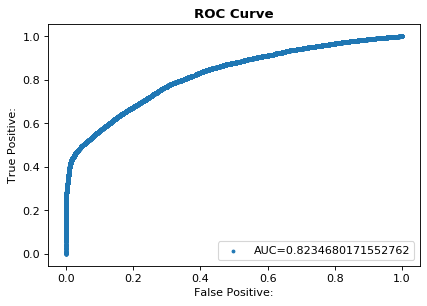

In [126]:
from sklearn.metrics import roc_auc_score, roc_curve
xgb_fp,xgb_tp,thresholds = roc_curve(y_val,xgb.predict_proba(X_val)[:,1])

auc_xgb=roc_auc_score(y_val, xgb.predict_proba(X_val)[:,1])

fig = plt.figure(dpi=80)
plt.scatter(xgb_fp,xgb_tp, s=6,label="AUC="+str(auc_xgb))
plt.title('ROC Curve', fontweight = 'bold', fontsize = 12)
plt.legend(loc=4)
plt.xlabel('False Positive:', fontsize = 10)
plt.ylabel('True Positive:', fontsize = 10);

In [127]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     99167
           1       0.85      0.44      0.58     24831

    accuracy                           0.87    123998
   macro avg       0.86      0.71      0.75    123998
weighted avg       0.87      0.87      0.86    123998



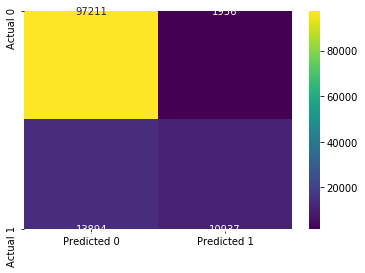

In [128]:
plot_confusion_matrix(y_test, y_pred_test);

In [129]:
display(confusion_matrix(y_test, y_pred_test))

array([[97211,  1956],
       [13894, 10937]])